In [3]:
!unzip eyes-rtte.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: maleeyes/2430.jpg       
  inflating: maleeyes/2431.jpg       
  inflating: maleeyes/2432.jpg       
  inflating: maleeyes/2433.jpg       
  inflating: maleeyes/2434.jpg       
  inflating: maleeyes/2435.jpg       
  inflating: maleeyes/2436.jpg       
  inflating: maleeyes/2437.jpg       
  inflating: maleeyes/2438.jpg       
  inflating: maleeyes/2439.jpg       
  inflating: maleeyes/244.jpg        
  inflating: maleeyes/2440.jpg       
  inflating: maleeyes/2441.jpg       
  inflating: maleeyes/2442.jpg       
  inflating: maleeyes/2443.jpg       
  inflating: maleeyes/2444.jpg       
  inflating: maleeyes/2445.jpg       
  inflating: maleeyes/2446.jpg       
  inflating: maleeyes/2448.jpg       
  inflating: maleeyes/2449.jpg       
  inflating: maleeyes/245.jpg        
  inflating: maleeyes/2450.jpg       
  inflating: maleeyes/2452.jpg       
  inflating: maleeyes/2453.jpg       
  inflating: maleeyes/2454.jpg       
  i

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

In [65]:
train_generator = train_datagen.flow_from_directory('/content/datas',target_size=(64, 64),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    color_mode="grayscale",
                                                    subset='training')

Found 9221 images belonging to 2 classes.


In [66]:
test_generator = train_datagen.flow_from_directory('/content/datas',target_size=(64, 64),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    color_mode="grayscale",
                                                    subset='validation')

Found 2304 images belonging to 2 classes.


In [141]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import Sequential

model = Sequential(name="Emirhan_Eye_Gender_Detection_Deep_Learning")

model.add(keras.Input(shape=(64, 64, 1)))

model.add(layers.Conv2D(filters=32, kernel_size=(2,2), activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, kernel_size=(2,2), activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, kernel_size=(2,2), activation="relu"))

model.add(layers.Flatten())

num_classes = 2
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation="softmax"))
                                                                                                                                                                                                                                                                                                                                                                                                   
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [77]:
model_history = model.fit(train_generator,
                          epochs=32,
                          shuffle=True,
                          validation_data=test_generator,
                          callbacks=[
    keras.callbacks.ModelCheckpoint("model/save_at_{epoch}.h5")],
                          batch_size=64)

Epoch 1/32
73/73 [==============================] - 7s 81ms/step - loss: 0.7550 - accuracy: 0.5559 - val_loss: 0.6638 - val_accuracy: 0.5512
Epoch 2/32
73/73 [==============================] - 6s 79ms/step - loss: 0.5672 - accuracy: 0.6948 - val_loss: 0.4947 - val_accuracy: 0.7708
Epoch 3/32
73/73 [==============================] - 6s 78ms/step - loss: 0.4843 - accuracy: 0.7723 - val_loss: 0.4480 - val_accuracy: 0.8082
Epoch 4/32
73/73 [==============================] - 6s 79ms/step - loss: 0.4318 - accuracy: 0.7968 - val_loss: 0.3764 - val_accuracy: 0.8351
Epoch 5/32
73/73 [==============================] - 6s 79ms/step - loss: 0.4008 - accuracy: 0.8177 - val_loss: 0.3864 - val_accuracy: 0.8325
Epoch 6/32
73/73 [==============================] - 6s 79ms/step - loss: 0.3830 - accuracy: 0.8201 - val_loss: 0.3485 - val_accuracy: 0.8459
Epoch 7/32
73/73 [==============================] - 6s 79ms/step - loss: 0.3899 - accuracy: 0.8220 - val_loss: 0.3549 - val_accuracy: 0.8433
Epoch 8/32
73

In [109]:
!unzip test_data.zip

Archive:  test_data.zip
replace test_data/female/female_photo.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_data/female/female_photo.jpg  
replace test_data/male/male_photo.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_data/male/male_photo.jpg  
replace test_data/male/male_photo_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_data/male/male_photo_1.jpg  
replace test_data/male/male_photo_2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_data/male/male_photo_2.jpg  


In [110]:
test_data_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_data_datagen.flow_from_directory('/content/test_data',target_size=(64, 64),
                                                    batch_size=8,
                                                    class_mode='categorical',color_mode="grayscale")

Found 4 images belonging to 2 classes.


In [138]:
from tensorflow.keras.models import load_model

#73/73 [==============================] - 6s 79ms/step - loss: 0.2415 - accuracy: 0.8882 - val_loss: 0.2542 - val_accuracy: 0.8984
#Because This is not overfitting. After from 15 epoch, start overfitting :((
model = load_model('/content/model/save_at_15.h5')

prediction_gender_from_eye = model.predict(test_data)

model.evaluate(test_data)

1/1 [==============================] - 0s 149ms/step - loss: 0.1727 - accuracy: 1.0000


[0.17271073162555695, 1.0]

Your Prediction: 
Hey Emirhan! Your gender is Male, man!


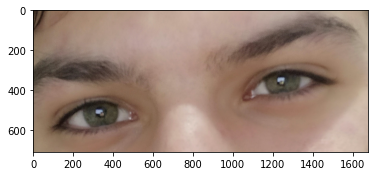

In [139]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/content/emirhan_eye.jpg')
imgg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img / 255
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,1])
predict_emirhan_eye = model.predict(img)
print("""Your Prediction: """)
if predict_emirhan_eye[0][1] > predict_emirhan_eye[0][0] :
  print("Hey Emirhan! Your gender is Male, man!")
elif predict_emirhan_eye[0][0] > predict_emirhan_eye[0][1] :
    print("Hey Emirhan! Your gender is Female, Matmazel :))!")
plt.imshow(imgg)
plt.show()